[CONFIG] Loaded: {'workarea': {'pose': {'x': 100, 'y': -200, 'z': -20, 'yaw': 0}, 'plane_markers': {'15': {'tag_id': '15', 'local': {'x': 1176.0, 'y': 776.75}, 'global': {'x': 0, 'y': 0}}, '16': {'tag_id': '16', 'local': {'x': 1153.5, 'y': 499.75}, 'global': {'x': 154, 'y': 0}}, '11': {'tag_id': '11', 'local': {'x': 896.25, 'y': 520.25}, 'global': {'x': 154, 'y': 154}}, '10': {'tag_id': '10', 'local': {'x': 917.25, 'y': 787.75}, 'global': {'x': 0, 'y': 154}}}, 'fence': {'xmin': 250, 'xmax': 1200, 'ymin': 50, 'ymax': 1030}}, 'place_pose': {'x': 330, 'y': 90, 'z': 68}, 'buttons': [{'name': 'Plate 1', 'x': 50, 'y': 10, 'width': 150, 'height': 40, 'color': [100, 200, 100]}, {'name': 'Plate 3', 'x': 220, 'y': 10, 'width': 150, 'height': 40, 'color': [100, 100, 200]}, {'name': 'Plate 4', 'x': 390, 'y': 10, 'width': 150, 'height': 40, 'color': [200, 100, 100]}, {'name': 'Plate 5', 'x': 560, 'y': 10, 'width': 150, 'height': 40, 'color': [200, 200, 100]}], 'scale_factor': 0.75, 'image_width': 2

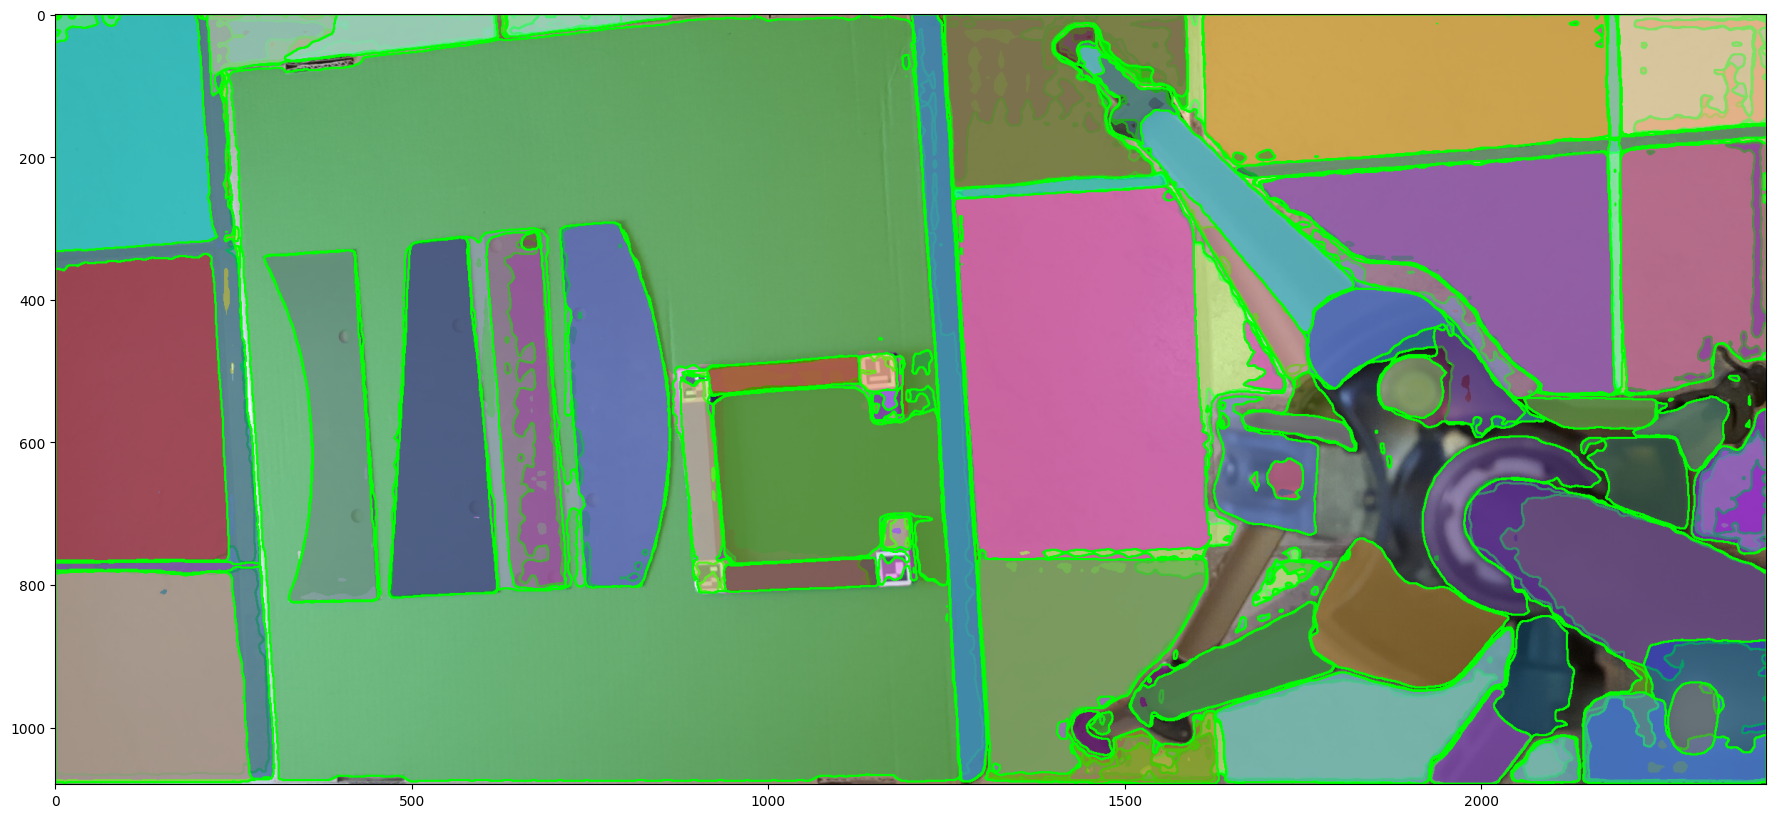

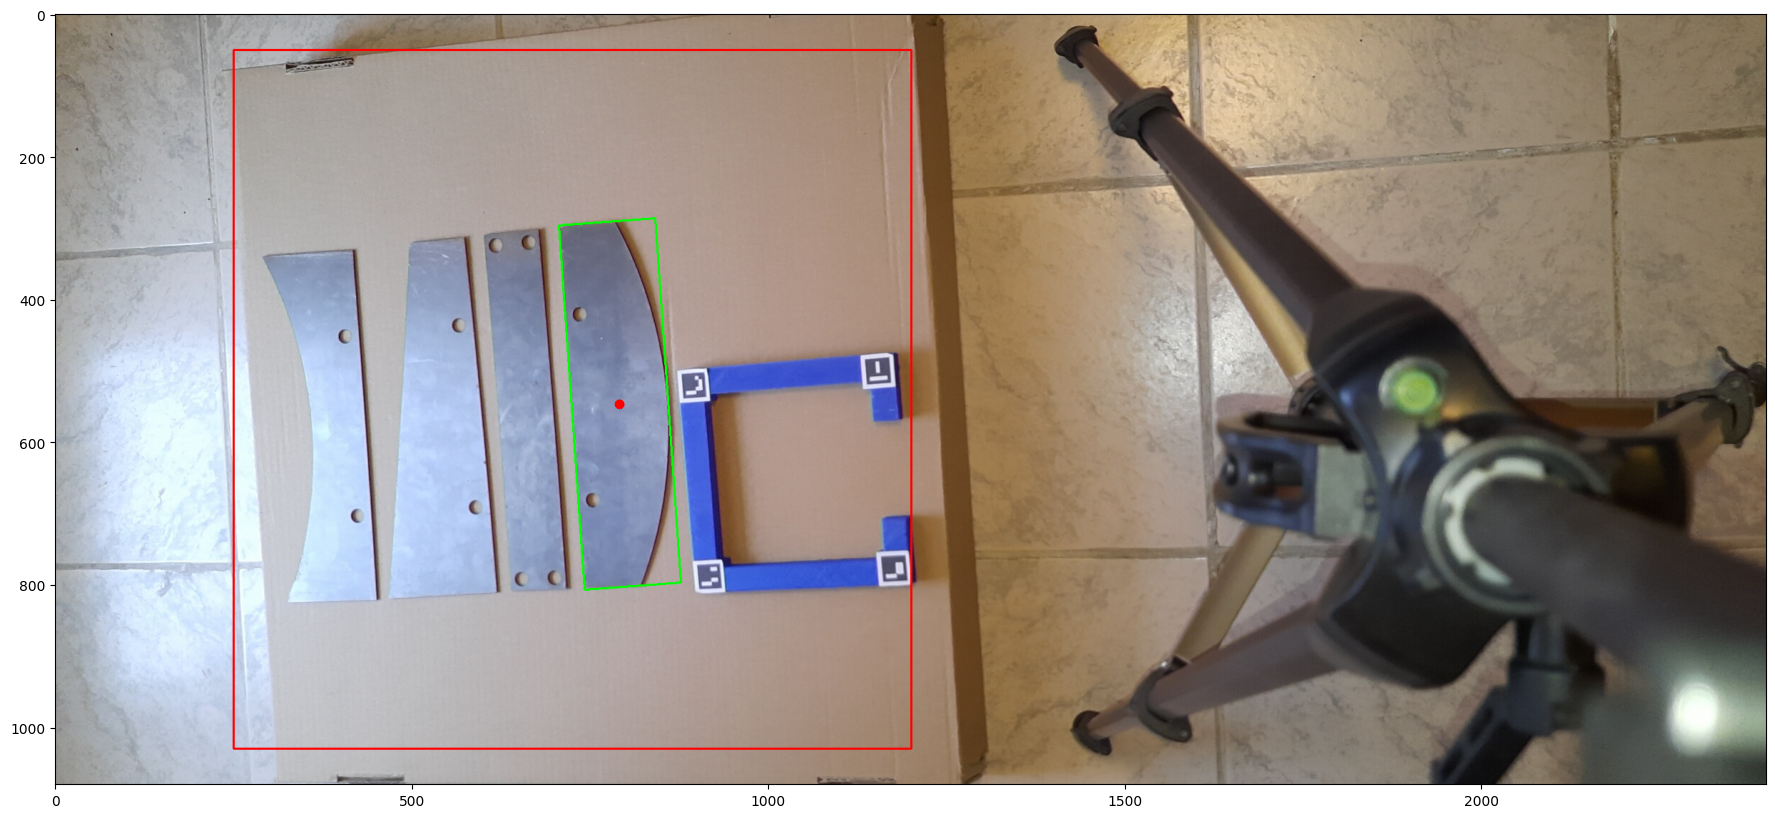

{'x': 243.3087930418892, 'y': 21.119085306127346, 'yaw': 85.89612579345702}


In [1]:
import cv2
import matplotlib.pyplot as plt
import glob
import sys, os

sys.path.append(os.path.abspath(".."))

from segmentation.segment import SegmentWithSAM
from segmentation.detect import ObjectDetector

import utils.json_config

CONFIG = utils.json_config.load("../config/pick_and_place_gui.json")
OBJECTS = utils.json_config.load("../config/objects.json")
IMAGE_PATH = "../captured/f093cf83020341ceaa75a9fe698b2ff3.jpg"
OBJECT = "Plate 4"

object_params = OBJECTS[OBJECT]
workarea = CONFIG['workarea']
segment = SegmentWithSAM("../sam_vit_b_01ec64.pth")
detect = ObjectDetector()

for image_path in sorted(glob.glob(IMAGE_PATH)):
    image = cv2.imread(image_path)
    masks = segment.get_masks(image)
    annotated = segment.plot_masks(image, masks)

    plt.figure(figsize=(40,10))
    plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
    plt.show()
        
    result, pick_pose = detect.detect_object(image, masks, object_params, fence=workarea['fence'])
    
    plt.figure(figsize=(40,10))
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.show()

    if pick_pose is not None:
        global_pick_pose = detect.convert_to_global_coordinates(pick_pose, workarea)
        print(global_pick_pose)
    else:
        print("Object is not detected.")